# Tyler Tobin - 001105522 - COMP 1816 Machine Learning

# Classification

**ExtraTreesClassifier, MLPClassifier and LogisticRegression**




In [12]:
# Tyler Tobin - 001105522 - COMP 1816 Machine Learning
# Classification Task - ExtraTreesClassifier, MLPClassifier and LogisticRegression

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn import ensemble
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import model_selection
from sklearn import linear_model
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from google.colab import files

uploaded = files.upload()



Saving Titanic_test.csv to Titanic_test (3).csv
Saving Titanic_train.csv to Titanic_train (3).csv


----------
F1 Score:   0.8735978056169655
Precision:   0.8915130568356375
Recall:   0.8638761104060914
0
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
F1 Score:   0.8025036460865338
Precision:   0.8114450818990604
Recall:   0.7970931154822335
1
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
F1 Score:   0.8295916168939211
Precision:   0.8559263814557502
Recall:   0.8184684327411167
2
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
               MLA Name                                     MLA Parameters  \
0  ExtraTreesClassifier  {'bootstrap': False, 'ccp_alpha': 0.0, 'class_...   
1    LogisticRegression  {'C': 1.0, 'class_weight': None, 'dual': False...   
2         MLPClassifier  {'activation': 'relu', 'alpha': 0.1, 'batch_si...   

  MLA Train Accuracy Mean MLA Test Accuracy Mean MLA Test Accuracy 3*STD  \
0                 0.89641               0.814872                0.062474   
1                0.820513                    0.8                0.052848   
2                0.866154               0.7

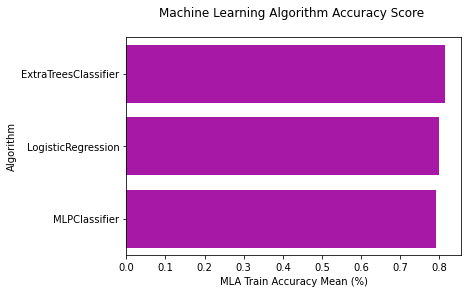

Highest Accuracy Score: ( 1 ):  0.8735978056169655


In [14]:

y_pd = pd.read_csv("Titanic_test.csv")
x_pd = pd.read_csv("Titanic_train.csv")
# df = pd.concat([train_df, test_df])

'''
print(df.columns.values)
print('Descriptive statistics of train_df:\n')
print(df.describe(include = 'all'))
'''
#print(df.head(11))

#print(df.shape)

#Find the number duplicate record
#print('df - Number of duplicate Record:', df.duplicated().sum())
#print('sub_df - Number of duplicate Record:', sub_df.duplicated().sum())

'''
#Find the number of null per each columns
print('Columns in df with null values:\n')
print(df.isnull().sum())
print("-"*30)

print('Columns in sub_df with null values:\n')
print(sub_df.isnull().sum())
print("-"*30)
'''

X_train_raw = [x_pd]
X_test_raw = [y_pd]
#pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns', None)

pClass_dummies = pd.get_dummies(x_pd.Pclass).add_prefix("C")
df = pd.concat([x_pd, pClass_dummies], axis=1)
df = df.drop(['Pclass'], axis=1)

pClass_dummies = pd.get_dummies(y_pd.Pclass).add_prefix("C")
sub_df = pd.concat([y_pd, pClass_dummies], axis=1)
sub_df = sub_df.drop(['Pclass'], axis=1)


#One hot encoding - USING!
#print(pd.get_dummies(df.Sex))



#Label encoding - NOT USING! - only for predicting the missing age values
#This section is just for later!
for dataset in X_train_raw:
    dataset['Sex'] = dataset['Sex'].map( {'female' : 1, 'male' : 0} ).astype(int)

for dataset in X_test_raw:
    dataset['Sex'] = dataset['Sex'].map( {'female' : 1, 'male' : 0} ).astype(int)


print('----------')
#print(df.head())

'''
grid = sns.FacetGrid(df, row='Pclass', col='Sex', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()
plt.show()
'''

#age generation for missing train values
guess_ages = np.zeros((2,3))
#print(guess_ages)

for dataset in X_train_raw:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j + 1)]['Age'].dropna()
            age_guess = guess_df.median()
            guess_ages[i, j] = int(age_guess / 0.5 + 0.5) * 0.5

    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j + 1), 'Age'] = guess_ages[
                i, j]

    dataset['Age'] = dataset['Age'].astype(int)
    dfAge = pd.DataFrame(dataset['Age'], columns=['Age'])
    df.drop(df.columns[[3]], axis=1, inplace=True)
    df = pd.concat([df, dfAge], axis=1)

#===============================================================================
#Age generation for test dataset

guess_ages_test = np.zeros((2,3))
#print(guess_ages)

for dataset in X_test_raw:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df_test = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j + 1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)
            age_guess_test = guess_df_test.median()
            # Convert random age float to nearest .5 age
            guess_ages_test[i, j] = int(age_guess_test / 0.5 + 0.5) * 0.5

    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j + 1), 'Age'] = guess_ages_test[
                i, j]

    dataset['Age'] = dataset['Age'].astype(int)
    dfAge_test = pd.DataFrame(dataset['Age'], columns=['Age'])
    sub_df.drop(sub_df.columns[[3]], axis=1, inplace=True)
    sub_df = pd.concat([sub_df, dfAge_test], axis=1)

#===============================================================================
#print(dfAge)
#Find the value count of train_df['Embarked']

# Find the mode of train_df['Embarked']
freq_port = df.Embarked.dropna().mode()[0]
freq_port2 = sub_df.Embarked.dropna().mode()[0]

for dataset in X_train_raw:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

for dataset in X_test_raw:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port2)

# Converting categorical feature to numeric

for dataset in X_train_raw:
    dataset['Embarked'] = dataset['Embarked'].map({"S": 1, "C": 2, "Q": 3})

for dataset in X_test_raw:
    dataset['Embarked'] = dataset['Embarked'].map({"S": 1, "C": 2, "Q": 3})

embarked_dummies = pd.get_dummies(df.Embarked)
df = pd.concat([df, embarked_dummies], axis=1)
df = df.drop(['Embarked'], axis=1)

embarked_dummies = pd.get_dummies(sub_df.Embarked)
sub_df = pd.concat([sub_df, embarked_dummies], axis=1)
sub_df = sub_df.drop(['Embarked'], axis=1)

gender_dummies = pd.get_dummies(df.Sex)
df = pd.concat([df, gender_dummies], axis=1)
df = df.drop(['Sex'], axis=1)

gender_dummies = pd.get_dummies(sub_df.Sex)
sub_df = pd.concat([sub_df, gender_dummies], axis=1)
sub_df = sub_df.drop(['Sex'], axis=1)

for dataset in X_train_raw:
    #dataset['Fare'].fillna(dataset['Fare'].dropna().mean(), inplace=True)
    dataset['Fare'] = dataset['Fare'].astype(np.int64)

for dataset in X_test_raw:
    #dataset['Fare'].fillna(dataset['Fare'].dropna().mean(), inplace=True)
    dataset['Fare'] = dataset['Fare'].astype(np.int64)

df = df.drop(['Name'], axis=1)
sub_df = sub_df.drop(['Name'], axis = 1)


#print('Columns in df with null values:\n')
#print(sub_df.isnull().sum())

#print(sub_df.head(7))
#=========family size TRAIN ===============

for dataset in X_train_raw:

    family_size = dataset['SibSp'] + dataset['Parch'] + 1
    df = pd.concat([df, family_size], axis=1)
df = df.drop(['Parch'], axis=1)
df = df.drop(['SibSp'], axis=1)
df = df.drop(['Ticket'], axis=1)
#df = df.drop(['Fare'], axis=1)
#df = df.drop(['PassengerId'], axis=1)
df.rename(columns={0: 'family_size'}, inplace=True)



family_size_dummies = pd.get_dummies(df.family_size).add_prefix("Fs")
df = pd.concat([df, family_size_dummies], axis=1)
df = df.drop(['family_size'], axis=1)

#===========================TEST===================

for dataset in X_test_raw:

    family_size_test = dataset['SibSp'] + dataset['Parch'] + 1
    sub_df = pd.concat([sub_df, family_size_test], axis=1)
sub_df = sub_df.drop(['Parch'], axis=1)
sub_df = sub_df.drop(['SibSp'], axis=1)
sub_df = sub_df.drop(['Ticket'], axis=1)
#df = df.drop(['Fare'], axis=1)
#sub_df = sub_df.drop(['PassengerId'], axis=1)
sub_df.rename(columns={0: 'family_size'}, inplace=True)

family_size_dummies_test = pd.get_dummies(sub_df.family_size).add_prefix("Fs")
sub_df = pd.concat([sub_df, family_size_dummies_test], axis=1)
sub_df = sub_df.drop(['family_size'], axis=1)

#==================================================

for dataset in X_train_raw:
    #Fare Bins/Buckets using qcut or frequency bins
    FareBin = pd.qcut(dataset['Fare'], 4)
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)
    df = df.drop(['Fare'], axis=1)
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)
    df = df.drop(['Age'], axis=1)
    df = pd.concat([df, dataset['FareBin'], dataset['AgeBin']], axis=1)

FareBin_dummies = pd.get_dummies(df.FareBin).add_prefix("Fare")
df = pd.concat([df, FareBin_dummies], axis=1)
df = df.drop(['FareBin'], axis=1)

AgeBin_dummies = pd.get_dummies(df.AgeBin).add_prefix("Age")
df = pd.concat([df, AgeBin_dummies], axis=1)
df = df.drop(['AgeBin'], axis=1)

#applying the same binning to the test set

#Binning variable - Fare & Age
for dataset in X_test_raw:
    #Fare Bins/Buckets using qcut or frequency bins
    #FareBin_test = pd.qcut(dataset['Fare'], 4)
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)
    sub_df = sub_df.drop(['Fare'], axis=1)

    #Age Bins/Buckets using cut or value bins
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)
    sub_df = sub_df.drop(['Age'], axis=1)

    sub_df = pd.concat([sub_df, dataset['FareBin'], dataset['AgeBin']], axis=1)

FareBin_dummies_test = pd.get_dummies(sub_df.FareBin).add_prefix("Fare")
sub_df = pd.concat([sub_df, FareBin_dummies_test], axis=1)
sub_df = sub_df.drop(['FareBin'], axis=1)

AgeBin_dummies_test = pd.get_dummies(sub_df.AgeBin).add_prefix("Age")
sub_df = pd.concat([sub_df, AgeBin_dummies_test], axis=1)
sub_df = sub_df.drop(['AgeBin'], axis=1)

#========================================

'''
#pie chart of survivors by gender
f,ax=plt.subplots(1,2,figsize=(12,6))
df['Target: Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

#heat map of correlation to survival
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['Target: Survived']].sort_values(by='Target: Survived', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Survived', fontdict={'fontsize':18}, pad=16);
plt.show()
'''

#=-=-=-=-=-=-=-= Train and Testing =-=-=-=-=-=-=-=-=

X_train = df.drop("Target: Survived", axis=1)
Y_train = df["Target: Survived"]
X_test  = sub_df.drop("PassengerId", axis=1).copy()
#print(X_train.shape, Y_train.shape, X_test.shape)

Target = ['Target: Survived']

data1_x = ['Sex','Pclass', 'Embarked','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone']

data1_x_calc = ['C1', 'C2', 'C3', 'C', 'Q', 'S', 'female', 'male', 'Fs1', 'Fs2', 'Fs3', 'Fs4', 'Fs5',
                'Fs6', 'Fs7', 'Fs8', 'Fs11', 'Fare(-0.001, 7.0]', 'Fare(7.0, 15.0]', 'Fare(15.0, 30.0]',
                'Fare(30.0, 512.0]', 'Age(-0.08, 16.0]', 'Age(16.0, 32.0]', 'Age(32.0, 48.0]',
                'Age(48.0, 64.0]', 'Age(64.0, 80.0]']



#print(df.head())


MLA = [
    ensemble.ExtraTreesClassifier(),
    LogisticRegression(solver='liblinear', penalty='l2'),
    #MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
    #Best regulisation weight found to be 0.1
    MLPClassifier(solver='lbfgs', alpha=0.1, hidden_layer_sizes=(5, 2), random_state=1, learning_rate = 'adaptive')
]

cv_split = model_selection.ShuffleSplit(n_splits=10, test_size=.3, train_size=.6,
                                        random_state=0)  # run model 10x with 60/30 split intentionally leaving out 10%


MLA_columns = ['MLA Name', 'MLA Parameters', 'MLA Train Accuracy Mean', 'MLA Test Accuracy Mean',
               'MLA Test Accuracy 3*STD', 'MLA Time']
MLA_DF = pd.DataFrame(columns=MLA_columns)


MLA_predict = df[Target]

MLA_stats = {}

row_index = 0
for alg in MLA:
    #Set the name of the algorithm of this iteration (either ExtraTreesClassifier or MLPClassifier)
    MLA_name = alg.__class__.__name__
    MLA_DF.loc[row_index, 'MLA Name'] = MLA_name
    MLA_DF.loc[row_index, 'MLA Parameters'] = str(alg.get_params())

    cv_results = model_selection.cross_validate(alg, df[data1_x_calc], df[Target], cv=cv_split, return_train_score=True)

    MLA_DF.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_DF.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_DF.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()
    MLA_DF.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std() * 3

    alg.fit(df[data1_x_calc], df[Target])
    MLA_predict[MLA_name] = alg.predict(df[data1_x_calc])
    print("F1 Score:  ",f1_score(df[Target], MLA_predict[MLA_name], average="macro"))
    print("Precision:  ",precision_score(df[Target], MLA_predict[MLA_name], average="macro"))
    print("Recall:  ",recall_score(df[Target], MLA_predict[MLA_name], average="macro"))
    print(row_index)
    MLA_stats.update({row_index: f1_score(df[Target], MLA_predict[MLA_name], average="macro")})

    print("-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")

    row_index += 1

MLA_DF.sort_values(by=['MLA Test Accuracy Mean'], ascending=False, inplace=True)
print(MLA_DF)

sns.barplot(x='MLA Test Accuracy Mean', y='MLA Name', data = MLA_DF, color='m')

#Visulise algorithm performance
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('MLA Train Accuracy Mean (%)')
plt.ylabel('Algorithm')
plt.show()

#print(MLA_stats)

d = MLA_stats[0]

for index in MLA_stats:
    #print(MLA_stats[index])
    if MLA_stats[index] > d:
        d = MLA_stats[index]
        i = index

print("Highest Accuracy Score: (", i, "): ", d)


# Regression - Ridge

In [8]:
# Tyler Tobin - 001105522 - COMP 1816 Machine Learning
# Regression task - RIDGE
#R^2 score: 0.65
#MSE: 0.35

# =-=-=-=-=-= Imports =-=-=-=-=-=
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from google.colab import files

uploaded = files.upload()


Saving housing_coursework_test.csv to housing_coursework_test.csv
Saving housing_coursework_train.csv to housing_coursework_train.csv


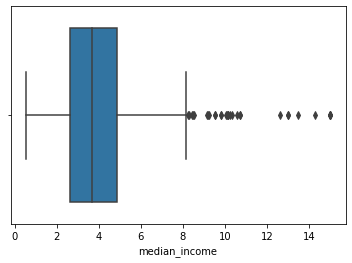

No.                   0
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64
(750, 6439)
Alpha 1e-10 Valid-MSE:  282627.34013608133
Alpha 1e-09 Valid-MSE:  207207.0229676733
Alpha 1e-08 Valid-MSE:  42577.76716685319
Alpha 1e-07 Valid-MSE:  17860.296082350633
Alpha 1e-06 Valid-MSE:  6464.357104213698
Alpha 1e-05 Valid-MSE:  1840.4379538462724
Alpha 0.0001 Valid-MSE:  636.7424717574337
Alpha 0.001 Valid-MSE:  87.57952697922474
Alpha 0.01 Valid-MSE:  11.97072660447945
Alpha 0.1 Valid-MSE:  3.0248024087403675
Alpha 1.0 Valid-MSE:  1.470621955917187
Alpha 10.0 Valid-MSE:  0.6267003714238353
Alpha 100.0 Valid-MSE:  0.4904447965469904
Alpha 1000.0 Valid-MSE:  0.5084144829775041
Alpha 10000.0 Valid-MSE:  0.5837723364909824
Alpha 100000.0 Valid-MSE:  0.6968510343157821
Alpha 1000000.0 Valid-MSE:  0

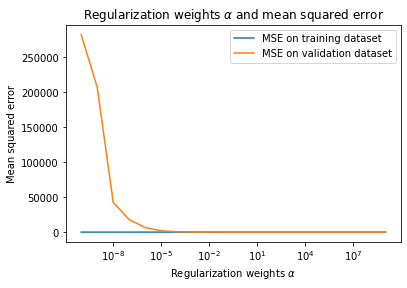

The best alpha: 100.0
(204, 6439)
MSE on the test data: 0.3533900162931248


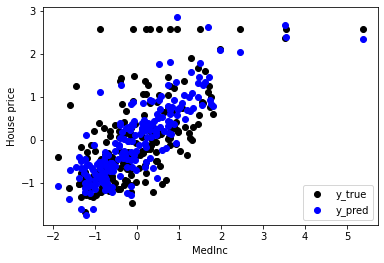

R2 score: 0.6462


In [9]:


# =-=-=-=-=-= Dataframe initialisation =-=-=-=-=-=
x_pd = pd.read_csv('housing_coursework_train.csv')
y_pd = pd.read_csv('housing_coursework_test.csv')

x_pd = pd.DataFrame(x_pd)
y_pd = pd.DataFrame(y_pd)

# Concatenating the train and test datasets for easier pre-processing
frames = [x_pd, y_pd]
raw_df = pd.concat(frames)

# Shuffling the index of combined dataset, for test purposes (can be trialed on or off)
rng = np.random.default_rng(0)
df = raw_df.iloc[rng.permutation(len(raw_df))].reset_index(drop=True)
# df = raw_df
# =-=-=-=-=-= Exploratory data analysis =-=-=-=-=-=

# Allowing the dataframe to be viewed easier in console
pd.set_option('display.max_columns', None)

# print(raw_df.head())
# df.total_rooms = df.total_rooms.fillna(df.total_rooms.mean())
# df.median_income = df.median_income.fillna(df.median_income.mean())
sns.boxplot(x=df["median_income"])
# sns.heatmap(df.corr(), annot=True)
plt.show()
# choose features

# Checking for any feature columns with a 'zero' present
print(df[df == 0].count())

# Setting the features to be included, some will be dropped later
col = ['No.', 'latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income',
       'ocean_proximity']

#Testing different combinations'
# col = ['median_income', 'ocean_proximity']
# X_raw = np.array(df[col])

'''
#Trial of removing rows with missing values
r, _ = np.where(df.isna())
print(r)
for index in r:
    df = df.drop(labels=index, axis=0)

r, _ = np.where(df.isna())
print(r, ": after removal")
'''
y = df['median_house_value']

'''
median = df['median_house_value'].median()
std = df['median_house_value'].std()
outliers = (df['median_house_value'] - median).abs() > std
df[outliers] = np.nan
df['median_house_value'].fillna(median, inplace=True)



df[outliers] = np.nan
df['total_rooms'].fillna(median, inplace=True)
'''

# Showing the outliers of a feature after correction code above (IF IT IS USED)
# sns.boxplot(x=df["median_house_value"])
# sns.heatmap(df.corr(), annot=True)
# plt.show()

X_raw = df[col]
# y = np.array(df['median_house_value'])

# Standardising the target
y = (y - y.mean()) / y.std()

# =-=-=-=-=-= Pre-Processing =-=-=-=-=-=

# Testing different combinations of features after looking at heatmap
X_raw = X_raw.drop(['No.'], axis=1)
# X_raw = X_raw.drop(['population'], axis=1)
# X_raw = X_raw.drop(['households'], axis=1)

# Split the data, producing a split of the original train and test numbers. Then validation data is split from train
X_non_test_raw, X_test_raw, y_non_test, y_test = train_test_split(X_raw, y, test_size=0.20, shuffle=True,
                                                                  random_state=0)
X_train_raw, X_valid_raw, y_train, y_valid = train_test_split(X_non_test_raw, y_non_test, test_size=0.08, shuffle=True,
                                                              random_state=0)

# Selecting a degree of polynomial features, 7 was gave the best evaluation metrics
degree = 7
# alpha_indices simply produces a list of 1-20 for the alphas to scale from
alpha_indices = np.arange(20)
alphas = 10.0 ** (alpha_indices - 10)
# creating an array to get the best MSE from differnt alphas
mse_train_array = np.full([len(alphas)], np.nan)
mse_valid_array = np.full([len(alphas)], np.nan)

poly = PolynomialFeatures(degree=degree)
# Standard scaler used as we have unfixed bounds
scaler = StandardScaler()

# Seperating the categorical data from numeric
X_train_num = X_train_raw.select_dtypes(include=np.number)
X_train_cat = X_train_raw.select_dtypes(exclude=np.number)

# Creating an imputer object for cat and num, I found using the median gave more accurate data
numeric_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

numeric_imputer.fit(X_train_num)
categorical_imputer.fit(X_train_cat)
X_train_num_imp = numeric_imputer.transform(X_train_num)
X_train_cat_imp = categorical_imputer.transform(X_train_cat)

# The polynomial features object will fit and transform the numpy array
X_train_poly = poly.fit_transform(X_train_num_imp)

# The data is now scaled to reduce sensitivity due to the large range of data
scaler.fit(X_train_poly)
X_train_num_sca = scaler.transform(X_train_poly)

# ONE HOT ENCODING
# To turn the categorical data in to something the regression model will understand it must
# be converted to its own 'label'
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
# The encoder is fit and transformed on the training data
encoder.fit(X_train_cat_imp)
X_train_onehot = encoder.transform(X_train_cat_imp)

# Finally the scaled numeric data is concatenated to the categorical features
X_train = np.concatenate([X_train_num_sca, X_train_onehot], axis=1)

print(X_train.shape)

# =============
# The same process is undertaken for the validation data separately to avoid data leakage
X_valid_num = X_valid_raw.select_dtypes(include=np.number)
X_valid_cat = X_valid_raw.select_dtypes(exclude=np.number)

numeric_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

numeric_imputer.fit(X_valid_num)
categorical_imputer.fit(X_valid_cat)
X_valid_num_imp = numeric_imputer.transform(X_valid_num)
X_valid_cat_imp = categorical_imputer.transform(X_valid_cat)

X_valid_poly = poly.fit_transform(X_valid_num_imp)
scaler.fit(X_valid_poly)

X_valid_num_sca = scaler.transform(X_valid_poly)

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoder.fit(X_valid_cat_imp)
X_valid_onehot = encoder.transform(X_valid_cat_imp)

X_valid = np.concatenate([X_valid_num_sca, X_valid_onehot], axis=1)

# =-=-=-=-=-= Training and finding best alpha =-=-=-=-=-=

# To find the best alpha for the test set, a loop using validation data can be utilised
for alpha_index, alpha in zip(alpha_indices, alphas):
    # Train
    # This will fit the model with a different alpha(regularisation weight) each time
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    mse_train = mean_squared_error(y_train, y_pred_train)

    y_pred_valid = model.predict(X_valid)
    mse_valid = mean_squared_error(y_valid, y_pred_valid)

    #Using the arrays created previously, the MSE will be saved for the alpha tested
    mse_train_array[alpha_index] = mse_train
    mse_valid_array[alpha_index] = mse_valid

    print("Alpha", alpha, "Valid-MSE: ", mse_valid)

#Visualise the different regularisation weights impact on MSE
plt.plot(alphas, mse_train_array, label='MSE on training dataset')
plt.plot(alphas, mse_valid_array, label='MSE on validation dataset')
plt.xlabel(r'Regularization weights $\alpha$')
plt.ylabel('Mean squared error')
plt.title(r'Regularization weights $\alpha$ and mean squared error')
plt.xscale('log')
plt.legend()
plt.show()

#Select our best performing alpha (lowest MSE)
best_alpha_index = np.argmin(mse_valid_array)
best_alpha = alphas[best_alpha_index]
print('The best alpha:', best_alpha)

# =-=-=-=-=-= Testing =-=-=-=-=-=

#Now the best regularisation weight has been found, we can refit the training data using the model with that alpha
model = Ridge(alpha=best_alpha)
model.fit(X_train, y_train)

#Complete the entire pre-processing steps taken earlier for the test data
X_test_num = X_test_raw.select_dtypes(include=np.number)
X_test_cat = X_test_raw.select_dtypes(exclude=np.number)

numeric_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

numeric_imputer.fit(X_test_num)
categorical_imputer.fit(X_test_cat)
X_test_num_imp = numeric_imputer.transform(X_test_num)
X_test_cat_imp = categorical_imputer.transform(X_test_cat)

X_test_poly = poly.fit_transform(X_test_num_imp)
scaler.fit(X_test_poly)

X_test_num_sca = scaler.transform(X_test_poly)

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoder.fit(X_test_cat_imp)
X_test_onehot = encoder.transform(X_test_cat_imp)

X_test = np.concatenate([X_test_num_sca, X_test_onehot], axis=1)
print(X_test.shape)

#Now the test data can be used to predict
y_pred_test = model.predict(X_test)
#The MSE and R^2 of the test data is now produced
mse_test = mean_squared_error(y_test, y_pred_test)

print('MSE on the test data:', mse_test)

#Visulisation of the data
plt.scatter(X_test[:, 8], y_test, color='black', label='y_true')  # Observed y values
plt.scatter(X_test[:, 8], y_pred_test, color='blue', label='y_pred')  # predicted y values
plt.xlabel('MedInc')
plt.ylabel('House price')
plt.legend()
plt.show()

print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_test, y_pred_test)))

coefficientList = model.coef_.tolist()
# print(coefficientList)


# Regression - Lasso

In [10]:
# Tyler Tobin - 001105522 - COMP 1816 Machine Learning
# Regression task - LASSO
# R^2 score: 0.63
# MSE: 0.32

# =-=-=-=-=-= Imports =-=-=-=-=-=
import numpy as np
import pandas as pd
import sklearn.linear_model, sklearn.datasets
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

from google.colab import files

uploaded = files.upload()

Saving housing_coursework_test.csv to housing_coursework_test (1).csv
Saving housing_coursework_train.csv to housing_coursework_train (1).csv


[208 320 345 464 607 655 711 719 956]
[] : after removal
(606, 6439)
Alpha 1e-10 Valid-MSE:  0.94441451784967
Alpha 1e-09 Valid-MSE:  0.9444060720598935
Alpha 1e-08 Valid-MSE:  0.9443213644077216
Alpha 1e-07 Valid-MSE:  0.9434338880820085
Alpha 1e-06 Valid-MSE:  0.9333559527414532
Alpha 1e-05 Valid-MSE:  0.9009127259671115
Alpha 0.0001 Valid-MSE:  0.6905410395823657
Alpha 0.001 Valid-MSE:  0.31062220247986083
Alpha 0.01 Valid-MSE:  0.2708345002703947
Alpha 0.1 Valid-MSE:  0.39384155281738187
Alpha 1.0 Valid-MSE:  1.0643548336847586
Alpha 10.0 Valid-MSE:  1.0643548336847586
Alpha 100.0 Valid-MSE:  1.0643548336847586
Alpha 1000.0 Valid-MSE:  1.0643548336847586
Alpha 10000.0 Valid-MSE:  1.0643548336847586
Alpha 100000.0 Valid-MSE:  1.0643548336847586
Alpha 1000000.0 Valid-MSE:  1.0643548336847586
Alpha 10000000.0 Valid-MSE:  1.0643548336847586
Alpha 100000000.0 Valid-MSE:  1.0643548336847586
Alpha 1000000000.0 Valid-MSE:  1.0643548336847586


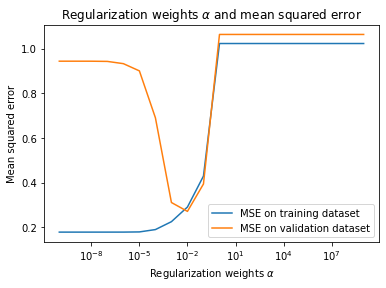

The best alpha: 0.01
(203, 6439)
MSE on the test data: 0.31874290870524663


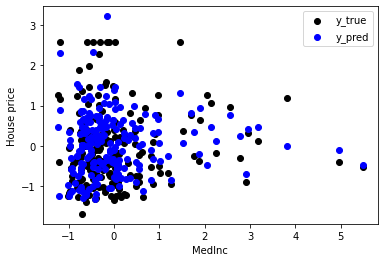

R2 score: 0.6283


In [11]:

# =-=-=-=-=-= Dataframe initialisation =-=-=-=-=-=
x_pd = pd.read_csv('housing_coursework_train.csv')  # Save it to a pandas dataframe
y_pd = pd.read_csv('housing_coursework_test.csv')
# Load the concrete dataset
x_pd = pd.DataFrame(x_pd)
y_pd = pd.DataFrame(y_pd)

frames = [x_pd, y_pd]

raw_df = pd.concat(frames)

# =-=-=-=-=-= Exploratory data analysis =-=-=-=-=-=

# Allowing the dataframe to be viewed easier in console
pd.set_option('display.max_columns', None)
# print(raw_df.head())

# Shuffle dataset (just for experiments)
rng = np.random.default_rng(0)
df = raw_df.iloc[rng.permutation(len(raw_df))].reset_index(drop=True)

# Using a heatmap to show correlation between features
# sns.heatmap(df.corr(), annot=True)
# plt.show()
# choose features
col = ['No.', 'latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income',
       'ocean_proximity']  # defined a new variable for the column names to make it easier to experiment with adding or removing columns
# col = ['median_income', 'ocean_proximity']
# X_raw = np.array(df[col])

# Trial of removing rows with missing values
# Using this with Lasso gives better results
r, _ = np.where(df.isna())
print(r)
for index in r:
    df = df.drop(labels=index, axis=0)

r, _ = np.where(df.isna())
print(r, ": after removal")

# ----------------------

X_raw = df[col]
# y = np.array(df['median_house_value'])
y = df['median_house_value']

# Standardise the target value
y = (y - y.mean()) / y.std()

X_raw = X_raw.drop(['No.'], axis=1)
# X_raw = X_raw.drop(['population'], axis=1)
# X_raw = X_raw.drop(['households'], axis=1)
# ========

# Split the data
X_non_test_raw, X_test_raw, y_non_test, y_test = train_test_split(X_raw, y, test_size=0.20, shuffle=True,
                                                                  random_state=0)
X_train_raw, X_valid_raw, y_train, y_valid = train_test_split(X_non_test_raw, y_non_test, test_size=0.25, shuffle=True,
                                                              random_state=0)

####################################
# Initialise Model and preprocessors
####################################

degree = 7  # Choose your degree. Regularisation will eliminate any values that hurt our model, but do beware about going to big, or python may not be able to cope with the number of features.
alpha_indices = np.arange(20)  # Get a list of 1-20
alphas = 10.0 ** (alpha_indices - 10)  # Define a list of alphas by taking indices from -1 to -20
# Get the MSE arrays
mse_train_array = np.full([len(alphas)], np.nan)
mse_valid_array = np.full([len(alphas)], np.nan)

poly = PolynomialFeatures(degree=degree)
scaler = StandardScaler()

#######################
# Training & validation
#######################
# PRE PROCCESS POTENTIALLY HERE


X_train_num = X_train_raw.select_dtypes(include=np.number)
X_train_cat = X_train_raw.select_dtypes(exclude=np.number)

numeric_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

numeric_imputer.fit(X_train_num)
categorical_imputer.fit(X_train_cat)
X_train_num_imp = numeric_imputer.transform(X_train_num)
X_train_cat_imp = categorical_imputer.transform(X_train_cat)

# preprocessing

X_train_poly = poly.fit_transform(X_train_num_imp)
scaler.fit(X_train_poly)

# Transform the training and test data
X_train_num_sca = scaler.transform(X_train_poly)

# create the encoder object
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
# Fit encoder on the training data
encoder.fit(X_train_cat_imp)
# Transform the test and train data
X_train_onehot = encoder.transform(X_train_cat_imp)

X_train = np.concatenate([X_train_num_sca, X_train_onehot], axis=1)

print(X_train.shape)

# =============
X_valid_num = X_valid_raw.select_dtypes(include=np.number)
X_valid_cat = X_valid_raw.select_dtypes(exclude=np.number)

numeric_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

numeric_imputer.fit(X_valid_num)
categorical_imputer.fit(X_valid_cat)
X_valid_num_imp = numeric_imputer.transform(X_valid_num)
X_valid_cat_imp = categorical_imputer.transform(X_valid_cat)

# preprocessing

X_valid_poly = poly.fit_transform(X_valid_num_imp)
scaler.fit(X_valid_poly)

# Transform the training and test data
X_valid_num_sca = scaler.transform(X_valid_poly)

# create the encoder object
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
# Fit encoder on the training data
encoder.fit(X_valid_cat_imp)
# Transform the test and train data
X_valid_onehot = encoder.transform(X_valid_cat_imp)

X_valid = np.concatenate([X_valid_num_sca, X_valid_onehot], axis=1)

# =-=-=-=-=-= Training and finding best alpha =-=-=-=-=-=

# To find the best alpha for the test set, a loop using validation data can be utilised
for alpha_index, alpha in zip(alpha_indices, alphas):
    # Train
    # This will fit the model with a different alpha(regularisation weight) each time
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    mse_train = mean_squared_error(y_train, y_pred_train)

    y_pred_valid = model.predict(X_valid)
    mse_valid = mean_squared_error(y_valid, y_pred_valid)

    # Using the arrays created previously, the MSE will be saved for the alpha tested
    mse_train_array[alpha_index] = mse_train
    mse_valid_array[alpha_index] = mse_valid
    print("Alpha", alpha, "Valid-MSE: ", mse_valid)

#Visualise the different regularisation weights impact on MSE
plt.plot(alphas, mse_train_array, label='MSE on training dataset')
plt.plot(alphas, mse_valid_array, label='MSE on validation dataset')
plt.xlabel(r'Regularization weights $\alpha$')
plt.ylabel('Mean squared error')
plt.title(r'Regularization weights $\alpha$ and mean squared error')
plt.xscale('log')
plt.legend()
plt.show()

#Select our best performing alpha (lowest MSE)
best_alpha_index = np.argmin(mse_valid_array)
best_alpha = alphas[best_alpha_index]
print('The best alpha:', best_alpha)

######
# Test
######

# =-=-=-=-=-= Testing =-=-=-=-=-=

#Now the best regularisation weight has been found, we can refit the training data using the model with that alpha
model = Lasso(alpha=best_alpha, max_iter=1000)
model.fit(X_train, y_train)

#Complete the entire pre-processing steps taken earlier for the test data
X_test_num = X_test_raw.select_dtypes(include=np.number)
X_test_cat = X_test_raw.select_dtypes(exclude=np.number)

numeric_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

numeric_imputer.fit(X_test_num)
categorical_imputer.fit(X_test_cat)
X_test_num_imp = numeric_imputer.transform(X_test_num)
X_test_cat_imp = categorical_imputer.transform(X_test_cat)

# preprocessing

X_test_poly = poly.fit_transform(X_test_num_imp)
scaler.fit(X_test_poly)

# Transform the training and test data
X_test_num_sca = scaler.transform(X_test_poly)

encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoder.fit(X_test_cat_imp)
X_test_onehot = encoder.transform(X_test_cat_imp)

X_test = np.concatenate([X_test_num_sca, X_test_onehot], axis=1)
print(X_test.shape)

#Now the test data can be used to predict
y_pred_test = model.predict(X_test)
#The MSE and R^2 of the test data is now produced
mse_test = mean_squared_error(y_test, y_pred_test)

print('MSE on the test data:', mse_test)

#Visulisation of the data
plt.scatter(X_test[:, 5], y_test, color='black', label='y_true')  # Observed y values
plt.scatter(X_test[:, 5], y_pred_test, color='blue', label='y_pred')  # predicted y values
plt.xlabel('MedInc')
plt.ylabel('House price')
plt.legend()
plt.show()

print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_test, y_pred_test)))

coefficientList = model.coef_.tolist()
# print(coefficientList)